In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings ('ignore')

In [ ]:
#EDA

In [3]:
data = pd.read_csv ("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv")

In [4]:
data.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [5]:
data.shape

(2318, 11)

In [6]:
data.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [ ]:
# There are no missing values in the dataset
# The std is less than mean
# quantiles are uniform in dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [17]:
#dropping unwanted columns
data = data.drop (columns = ['id'])

In [18]:
data = data.drop (columns = ['model','transmission','drive','hand_drive','fuel'], axis = 1)

In [19]:
data.head()

,price,year,mileage,engine_capacity
0,80,2003,80000,1240
1,110,2010,53000,1200
2,165,2005,47690,2000
3,190,2008,130661,1990
4,190,2006,66300,660


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

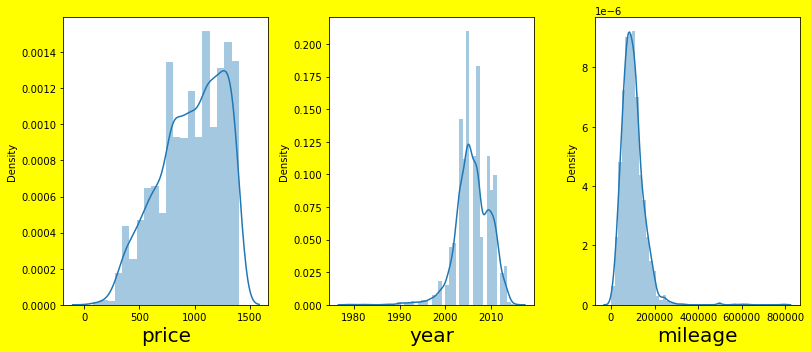

In [27]:
plt.figure (figsize = (15, 5), facecolor = 'yellow')
plotnumber = 1
for column in data:
    if plotnumber<=3:
        ax=plt.subplot (1,4,plotnumber)
        sns.distplot (data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
# the data distribution looks decent enough. There is no more skewness

In [40]:
y = data ['price']
x = data.drop (columns = ['price'])

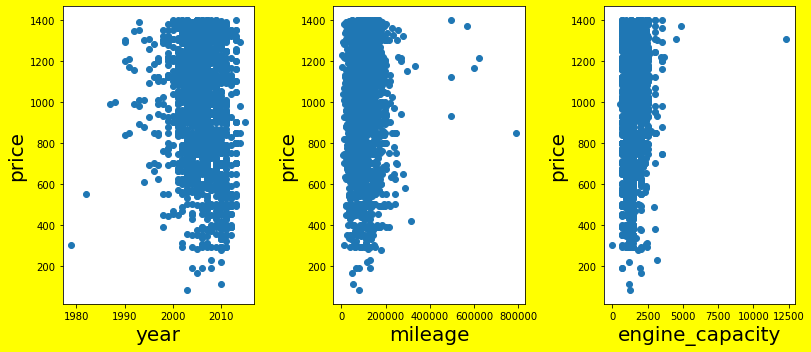

In [41]:
plt.figure (figsize = (15, 5), facecolor = 'yellow')
plotnumber = 1

for column in x:
    if plotnumber <=3:
        ax=plt.subplot (1,4,plotnumber)
        plt.scatter (x [column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('price', fontsize=20)
    plotnumber+=1
plt.tight_layout()